<a href="https://colab.research.google.com/github/bethms/MachineLearning/blob/main/Aula_Pr%C3%A1tica_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Integrantes:*
#### Aline Galantine
#### Elizabeth Machado Santos



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Leitura do arquivo, exibição do head ##

In [ ]:

auto_df = pd.read_excel("https://github.com/bethms/MachineLearning/blob/main/automoveis.xlsx?raw=true")

auto_df.head()

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","13495,00"
1,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","16500,00"
2,alfa-romeo,gas,2.0,hatch,traseira,"171,20","65,50","52,40",ohcv,6,"152,00",mpfi,"154,00","5000,00","16500,00"
3,audi,gas,4.0,sedan,dianteira,"176,60","66,20","54,30",ohc,4,"109,00",mpfi,"102,00","5500,00","13950,00"
4,audi,gas,4.0,sedan,4x4,"176,60","66,40","54,30",ohc,5,"136,00",mpfi,"115,00","5500,00","17450,00"


## PREPARAÇÃO DOS DADOS ##

In [ ]:
### Exibindo as informações do data frame ##
print("\nTipos dos dados:\n{0}\n".format(auto_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [ ]:
# Exibe apenas os campos numéricos:

print(auto_df.describe())

       Portas
count  203.00
mean     3.12
std      0.99
min      2.00
25%      2.00
50%      4.00
75%      4.00
max      4.00


In [ ]:
 ## Convertendo colunas numéricas:

auto_df['Comprimento'] = auto_df['Comprimento'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Largura'] = auto_df['Largura'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Altura'] = auto_df['Altura'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Tamanho do motor'] = auto_df['Tamanho do motor'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Potência (HP)'] = auto_df['Potência (HP)'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Pico RPM'] = auto_df['Pico RPM'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')
auto_df['Preço'] = auto_df['Preço'].apply(lambda x: x.replace(',', '.') if type(x) is str else x).astype('float')


In [ ]:
## Visualizando os atributos categóricos: 

categ = auto_df.dtypes[auto_df.dtypes == "object"].index
print("\n", auto_df[categ].describe(), sep='\n')



       Fabricante Combustível Estilo Chassis     Tração Tipo de motor  \
count         203         200            205        205           205   
unique         22           2              5          3             7   
top        toyota         gas          sedan  dianteira           ohc   
freq           32         180             96        120           148   

        Número de cilindros Tipo de injeção  
count                   205             205  
unique                    7               8  
top                       4            mpfi  
freq                    159              94  


In [ ]:
## Convertendo colunas categóricas:

auto_df['Fabricante'] = auto_df['Fabricante'].astype('category')
auto_df['Combustível'] = auto_df['Combustível'].astype('category')
auto_df['Portas'] = auto_df['Portas'].astype('category')
auto_df['Estilo Chassis'] = auto_df['Estilo Chassis'].astype('category')
auto_df['Tração'] = auto_df['Tração'].astype('category')
auto_df['Tipo de motor'] = auto_df['Tipo de motor'].astype('category')
auto_df['Número de cilindros'] = auto_df['Número de cilindros'].astype('category')
auto_df['Tipo de injeção'] = auto_df['Tipo de injeção'].astype('category')


In [ ]:
## Verificando o resultado:

print("\nTipos dos dados:\n{0}\n".format(auto_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Fabricante           203 non-null    category
 1   Combustível          200 non-null    category
 2   Portas               203 non-null    category
 3   Estilo Chassis       205 non-null    category
 4   Tração               205 non-null    category
 5   Comprimento          205 non-null    float64 
 6   Largura              205 non-null    float64 
 7   Altura               205 non-null    float64 
 8   Tipo de motor        205 non-null    category
 9   Número de cilindros  205 non-null    category
 10  Tamanho do motor     205 non-null    float64 
 11  Tipo de injeção      205 non-null    category
 12  Potência (HP)        205 non-null    float64 
 13  Pico RPM             205 non-null    float64 
 14  Preço                205 non-null    float64 
dtypes: category(8), float64

In [ ]:
## Verificando a estatística descritiva:

print("\n", auto_df[categ].describe(), sep='\n')



       Fabricante Combustível Estilo Chassis     Tração Tipo de motor  \
count         203         200            205        205           205   
unique         22           2              5          3             7   
top        toyota         gas          sedan  dianteira           ohc   
freq           32         180             96        120           148   

        Número de cilindros Tipo de injeção  
count                   205             205  
unique                    7               8  
top                       4            mpfi  
freq                    159              94  


## TRANSFORMAÇÃO DOS DADOS

In [ ]:
## Identificando valores omissos:
auto_df.isnull().sum()

Fabricante             2
Combustível            5
Portas                 2
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

In [ ]:
## Somente as colunas Fabricante, Combustível e Portas possuem valores nulos. 

## Para o Fabricante, visto não ter sido identificado nenhuma combinação para preenchimento possível, 
## e o valor 0 não ser aplicado por ser categórico, estes registros serão excluídos.
auto_df = auto_df[auto_df.Fabricante.notnull()]

In [ ]:
## Para o Combustível, visto que a grande maioria é gas, estes serão tambem convertidos para gas
comb = np.where(auto_df["Combustível"].isnull(), # condição
                   'gas',                       # valor se verdadeiro
                   auto_df["Combustível"])          # valor se falso
auto_df["Combustível"] = comb

print("\nAnálise do novo atributo Combustível:")
print(auto_df["Combustível"].describe())


Análise do novo atributo Combustível:
count     203
unique      2
top       gas
freq      183
Name: Combustível, dtype: object


In [ ]:
## Para portas o valor deve ser estimado com base nos campos Estilo chassis, Largura, e tamanho do motor

for index, row in auto_df.iterrows():
    if np.isnan(row['Portas']):
      estilo = row['Estilo Chassis']
      largura = row['Largura']
      motor = row['Tamanho do motor']
      for index2, row2 in auto_df.iterrows():
        if (row2['Estilo Chassis'] == estilo) and (row2['Largura'] == largura) and (row2['Tamanho do motor'] == motor) and (pd.notna(row2['Portas'])):
          porta = row2['Portas']
          auto_df.at[index,'Portas'] = porta

In [ ]:
## Conferindo remoção de omissos:
auto_df.isnull().sum()

Fabricante             0
Combustível            0
Portas                 0
Estilo Chassis         0
Tração                 0
Comprimento            0
Largura                0
Altura                 0
Tipo de motor          0
Número de cilindros    0
Tamanho do motor       0
Tipo de injeção        0
Potência (HP)          0
Pico RPM               0
Preço                  0
dtype: int64

In [ ]:
auto_df.head()

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,168.8,64.1,48.8,dohc,4,130.0,mpfi,111.0,5000.0,13495.0
1,alfa-romeo,gas,2.0,conversível,traseira,168.8,64.1,48.8,dohc,4,130.0,mpfi,111.0,5000.0,16500.0
2,alfa-romeo,gas,2.0,hatch,traseira,171.2,65.5,52.4,ohcv,6,152.0,mpfi,154.0,5000.0,16500.0
3,audi,gas,4.0,sedan,dianteira,176.6,66.2,54.3,ohc,4,109.0,mpfi,102.0,5500.0,13950.0
4,audi,gas,4.0,sedan,4x4,176.6,66.4,54.3,ohc,5,136.0,mpfi,115.0,5500.0,17450.0


## DETECTANDO OUTLIERS

Registros com preços extremos:
       Fabricante Combustível Portas Estilo Chassis    Tração  Comprimento  \
72  mercedes-benz         gas    2.0        hardtop  traseira        199.2   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
72     72.0    55.4          ohcv                oito             304.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
72            mpfi          184.0    4500.0  45400.0  


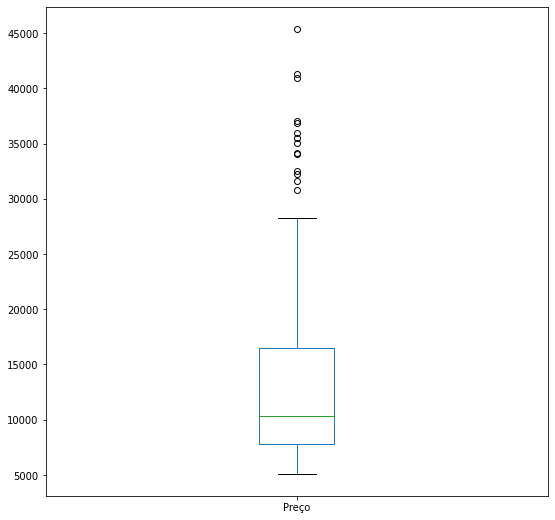

In [ ]:
## Exibindo variação de preços:

auto_df["Preço"].plot(kind="box", figsize=(9,9))
index = np.where(auto_df["Preço"] == max(auto_df["Preço"]) )
print("Registros com preços extremos:",auto_df.loc[index], sep='\n')

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis     Tração  Comprimento  \
17  chevrolet         gas    2.0          hatch  dianteira        141.1   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
17     60.3    53.2             l                   3              61.0   

   Tipo de injeção  Potência (HP)  Pico RPM   Preço  
17            2bbl           48.0    5100.0  5151.0  


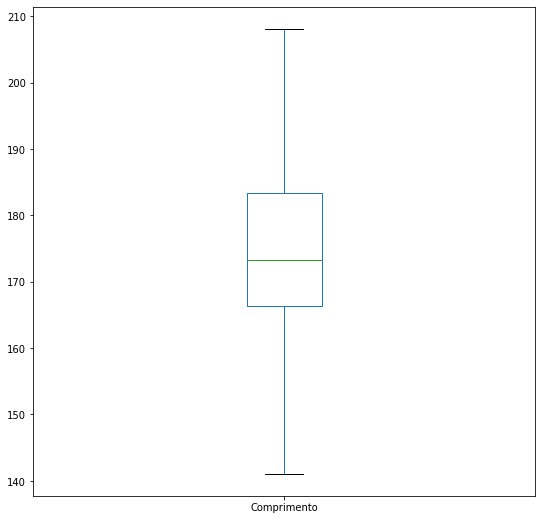

In [ ]:
## Exibindo variação de Comprimento:
auto_df['Comprimento'].plot(kind="box", figsize=(9,9))
index = np.where(auto_df['Comprimento'] == min(auto_df['Comprimento']))
print('Registros com valores extremos:', auto_df.loc[index], sep='\n')

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis     Tração  Comprimento  \
17  chevrolet         gas    2.0          hatch  dianteira        141.1   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
17     60.3    53.2             l                   3              61.0   

   Tipo de injeção  Potência (HP)  Pico RPM   Preço  
17            2bbl           48.0    5100.0  5151.0  


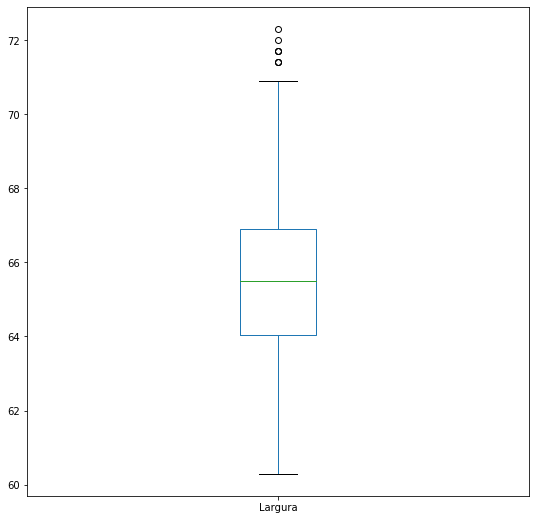

In [ ]:
## Exibindo variação de Largura:
auto_df['Largura'].plot(kind="box", figsize=(9,9))
index = np.where(auto_df['Largura'] == min(auto_df['Largura']))
print('Registros com valores extremos:', auto_df.loc[index], sep='\n')

Registros com valores extremos:
   Fabricante Combustível Portas Estilo Chassis    Tração  Comprimento  \
48     jaguar         gas    2.0          sedan  traseira        191.7   

    Largura  Altura Tipo de motor Número de cilindros  Tamanho do motor  \
48     70.6    47.8          ohcv                doze             326.0   

   Tipo de injeção  Potência (HP)  Pico RPM    Preço  
48            mpfi          262.0    5000.0  36000.0  


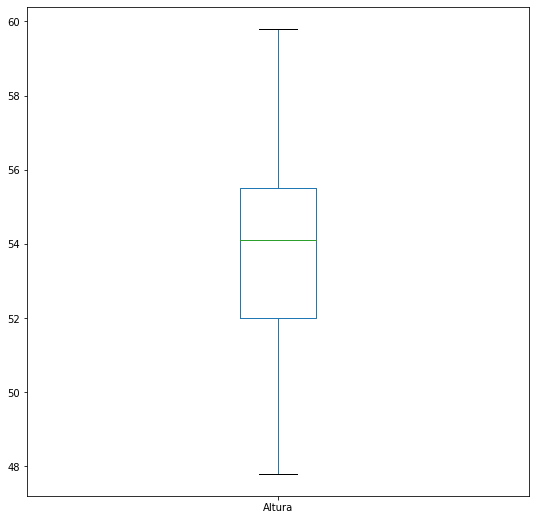

In [ ]:
## Exibindo variação de Altura:
auto_df['Altura'].plot(kind="box", figsize=(9,9))
index = np.where(auto_df['Altura'] == min(auto_df['Altura']))
print('Registros com valores extremos:', auto_df.loc[index], sep='\n')